In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter,FuncFormatter
from scipy import stats
import scipy as sp
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
portfolio = pd.read_json(r'C:\Desktop\ortfolio.json', orient='records', lines=True)
profile = pd.read_json(r'C:\Desktop\profile.json', orient='records', lines=True)
transcript = pd.read_json(r'C:\Desktop\transcript.json', orient='records', lines=True)

In [3]:
df=pd.DataFrame(transcript['value'].values.tolist(),index=transcript.index)

In [4]:
transcript=transcript.merge(df,left_index=True, right_index=True)

In [5]:
#one hot encode channels
mlb = MultiLabelBinarizer()
channel = pd.DataFrame(mlb.fit_transform(portfolio['channels']),columns=mlb.classes_, index=portfolio.index)

In [6]:
portfolio=portfolio.merge(channel,left_index=True, right_index=True)

In [7]:
transcript=transcript.merge(portfolio, left_on='offer_id', right_on='id', how='left')

In [8]:
transcript=transcript.merge(profile, left_on='person', right_on='id', how='left')

In [9]:
bins= [18,35,40,51,68,84,101]
labels = ['18-34','35-50','51-67','68-83','84-101']
transcript['age_group']=pd.cut(transcript['age'], bins=5, labels=labels,
                                     right=False)
#did not include age group 118 because they omitted gender, age, and income

In [10]:
tran=transcript.groupby(['age_group','gender','person'])['amount'].sum().reset_index()
tran=tran[tran['gender']!='O']

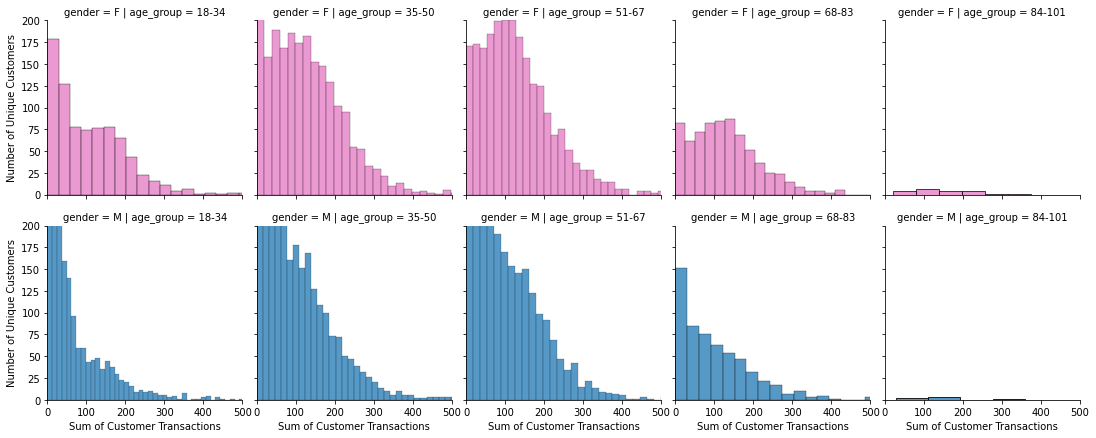

In [11]:
g = sns.FacetGrid(tran, col="age_group", row="gender",hue='gender', palette={'F': "tab:pink", 'M':"tab:blue"})
g.map_dataframe(sns.histplot, x="amount")
plt.xlim(0, 500)
plt.ylim(0, 200)
g.set(xlabel = "Sum of Customer Transactions",ylabel ="Number of Unique Customers")
plt.show()
#Using Facet Grid, we see that the customer segments that have the largest volume of transactions 
#are females between 35-57 years old.